<a href="https://colab.research.google.com/github/KEHSANN/hosh_masnoi/blob/main/q1_p1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

سوال 1 بخش 1
توضیحات: از تابع زیر برای تولید توابع استفاده میکنم



In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_classes=2 , class_sep=3, random_state=23, n_redundant=0, n_clusters_per_class=1)

print(X)

[[-2.5928702   3.22442221]
 [-3.24103977  2.64394441]
 [-3.1208303  -2.39350826]
 ...
 [-2.77732987 -3.37245697]
 [-3.39428116  2.94531499]
 [-2.80264729 -3.72042632]]


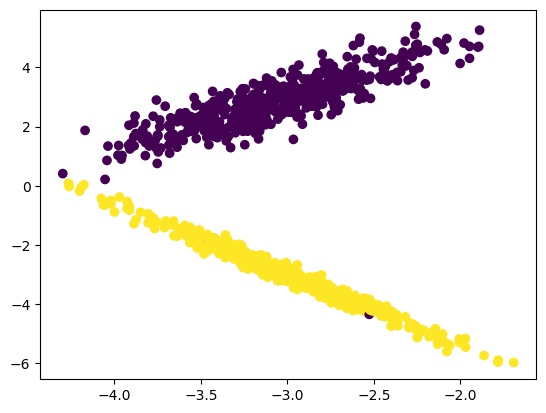

In [4]:
import matplotlib.pyplot as plt

# رسم داده‌ها
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# نمایش نمودار
plt.show()

سوال 1 قسمت 2

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# بدون انتخاب پارامتر مناسب
# یک رگراسیون لجستیک را بدون تنظیم پارامترها ایجاد میکنیم
log_reg = LogisticRegression()

# یک نسخه کپی از مدل برای استفاده بعدی ایجاد میکنیم
log_reg2 = log_reg

# مدل را روی مجموعه داده آموزشی آموزش میدهیم
log_reg2.fit(X_train, y_train)

y_pred = log_reg2.predict(X_test)

# دقت مدل را روی مجموعه داده آزمایشی محاسبه کنید
accuarcy2 = accuracy_score(y_test, y_pred)

# دقت مدل بدون انتخاب پارامتر مناسب را چاپ میکنیم
print("بدون پارامتر مناسب")
print(accuarcy2)

# تنظیم پارامترها با استفاده از GridSearchCV
# یک شبکه جستجوی پارامتر را با استفاده از مدل رگراسیون لجستیک و یک شبکه پارامتری ایجاد میکنیم
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
#cv داده هارو تقسیم میکنه و عملیات روی تمامی داده ها انجام میده

# مدل را با استفاده از شبکه جستجوی پارامترها روی مجموعه داده آموزشی آموزش میدهیم
grid_search.fit(X_train, y_train)

# برچسب های پیش بینی شده را برای مجموعه داده آزمایشی محاسبه میکنیم
y_pred = grid_search.predict(X_test)

#بهترین پارامترهای پیدا شده را چاپ میکنیم
best_params = grid_search.best_params_
print("بهترین مقادیر:")
print(best_params)

# بهترین مدل را از شبکه جستجوی پارامترها دریافت میکنیم
best_model = grid_search.best_estimator_

# دقت مدل بهینه را روی مجموعه داده آزمایشی محاسبه کنید
accuracy = accuracy_score(y_test, y_pred)

# دقت مدل بهینه را چاپ کنید
print("دقت طبقه‌بندی بهترین مدل:", accuracy)


#طبقه بندی 2
svm = SVC()

# مدل را روی مجموعه داده آموزشی آموزش دهید
svm.fit(X_train, y_train)

# پیش بینی های ماشین بردار پشتیبان را برای 5 نقطه اول مجموعه داده آزمایشی چاپ کنید
print("SVM predictions:", svm.predict(X_test[:5]))


بدون پارامتر مناسب
0.99


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

بهترین مقادیر:
{'max_iter': 100, 'solver': 'sag'}
دقت طبقه‌بندی بهترین مدل: 0.995
SVM predictions: [0 1 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(1000, 2)
(1000,)
(2, 26)
Logistic Regression predictions: [0 0 1 0 0]
SVM predictions: [0 0 1 0 0]
Decision Tree predictions: [0 0 1 0 1]
Logistic Regression train accuracy: 0.974
SVM train accuracy: 0.973
Decision Tree train accuracy: 1.0


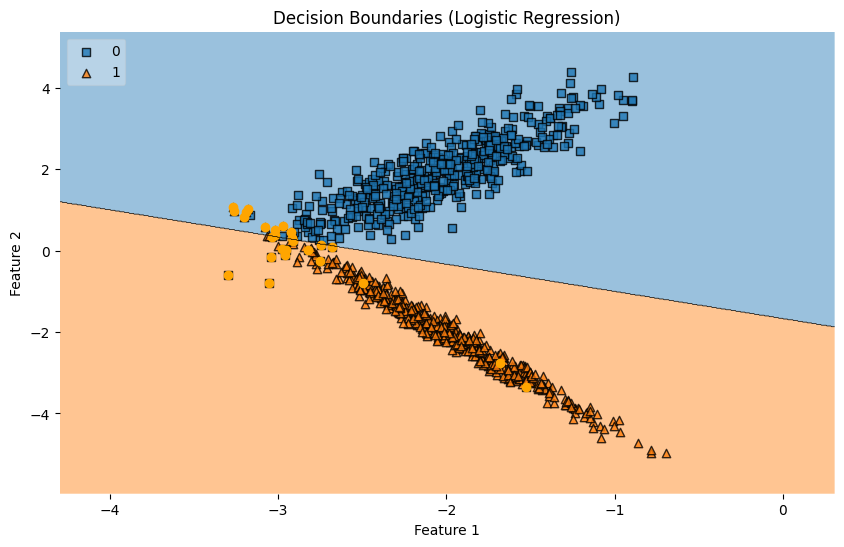

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

# ایجاد دیتاست با 1000 نمونه، 2 کلاس و 2 ویژگی
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_classes=2, class_sep=2, random_state=23, n_redundant=0, n_clusters_per_class=1)

# آموزش مدل‌ها
log_reg = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()

log_reg.fit(X, y)
svm.fit(X, y)
dt.fit(X, y)

# پیش‌بینی برچسب‌ها
y_pred_log_reg = log_reg.predict(X)

y_pred_svm = svm.predict(X)

y_pred_dt = dt.predict(X)


# محاسبه دقت مدل‌ها
accuracy_log_reg = log_reg.score(X, y)
accuracy_svm = svm.score(X, y)
accuracy_dt = dt.score(X, y)
print(X.shape)
print(y.shape)

#مختصات نقطه هایی که درست پیش بینی نشدن را برای نشان دادن در نمودار مشخ میکنیم
X2=X[y_pred_log_reg != y]
X2 = X2.T
# که یک ماتریس با دوبعد به ما میدهد که بعد اول برای ویژگی اول و بعد دوم برای ویژگی دوم
print(X2.shape)



print("Logistic Regression predictions:", y_pred_log_reg[:5])
print("SVM predictions:", y_pred_svm[:5])
print("Decision Tree predictions:", y_pred_dt[:5])

print("Logistic Regression train accuracy:", accuracy_log_reg)
print("SVM train accuracy:", accuracy_svm)
print("Decision Tree train accuracy:", accuracy_dt)

# رسم نمودار مرز و نواحی تصمیم‌گیری
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, clf=log_reg, legend=2)

#داده هایی که درست طبقه بندی نشده اند را نمایش میدهیم
plt.scatter(X2[0], X2[1], c='orange', label='Misclassified')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries (Logistic Regression)')
plt.show()

سوال1 قسمت *4*


n_clusters_per_class  افزایش

class_sep کاهش
```



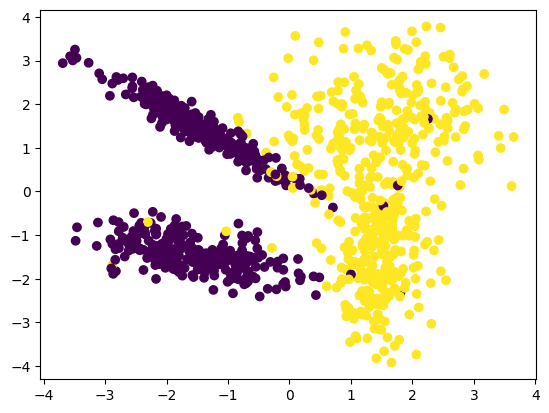

بدون پارامتر مناسب
0.97
بهترین مقادیر:
{'max_iter': 100, 'solver': 'newton-cg'}
دقت طبقه‌بندی بهترین مدل: 0.97
SVM predictions: [1 0 1 0 0]


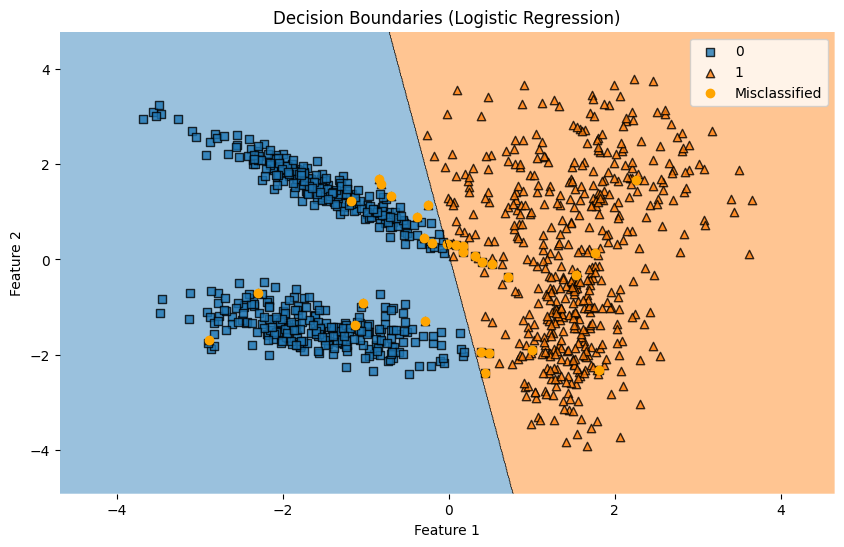

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_classes=2 , class_sep=1.5, random_state=23, n_redundant=0, n_clusters_per_class=2)
# رسم داده‌ها
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# نمایش نمودار
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# بدون انتخاب پارامتر مناسب
# یک رگراسیون لجستیک را بدون تنظیم پارامترها ایجاد میکنیم
log_reg = LogisticRegression()

# یک نسخه کپی از مدل برای استفاده بعدی ایجاد میکنیم
log_reg2 = log_reg

# مدل را روی مجموعه داده آموزشی آموزش میدهیم
log_reg2.fit(X_train, y_train)

y_pred = log_reg2.predict(X_test)

# دقت مدل را روی مجموعه داده آزمایشی محاسبه کنید
accuarcy2 = accuracy_score(y_test, y_pred)

# دقت مدل بدون انتخاب پارامتر مناسب را چاپ میکنیم
print("بدون پارامتر مناسب")
print(accuarcy2)

# تنظیم پارامترها با استفاده از GridSearchCV
# یک شبکه جستجوی پارامتر را با استفاده از مدل رگراسیون لجستیک و یک شبکه پارامتری ایجاد میکنیم
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
#cv داده هارو تقسیم میکنه و عملیات روی تمامی داده ها انجام میده

# مدل را با استفاده از شبکه جستجوی پارامترها روی مجموعه داده آموزشی آموزش میدهیم
grid_search.fit(X_train, y_train)

# برچسب های پیش بینی شده را برای مجموعه داده آزمایشی محاسبه میکنیم
y_pred = grid_search.predict(X_test)

#بهترین پارامترهای پیدا شده را چاپ میکنیم
best_params = grid_search.best_params_
print("بهترین مقادیر:")
print(best_params)

# بهترین مدل را از شبکه جستجوی پارامترها دریافت میکنیم
best_model = grid_search.best_estimator_

# دقت مدل بهینه را روی مجموعه داده آزمایشی محاسبه کنید
accuracy = accuracy_score(y_test, y_pred)

# دقت مدل بهینه را چاپ کنید
print("دقت طبقه‌بندی بهترین مدل:", accuracy)


#طبقه بندی 2
svm = SVC()

# مدل را روی مجموعه داده آموزشی آموزش دهید
svm.fit(X_train, y_train)

# پیش بینی های ماشین بردار پشتیبان را برای 5 نقطه اول مجموعه داده آزمایشی چاپ کنید
print("SVM predictions:", svm.predict(X_test[:5]))



log_reg = LogisticRegression()


log_reg.fit(X, y)

# پیش‌بینی برچسب‌ها
y_pred_log_reg = log_reg.predict(X)




X2=X[y_pred_log_reg != y]
X2 = X2.T

# رسم نمودار مرز و نواحی تصمیم‌گیری
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, clf=log_reg, legend=2)
plt.scatter(X2[0], X2[1], c='orange', label='Misclassified')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries (Logistic Regression)')
plt.legend()
plt.show()


سوال1 قسمت 5

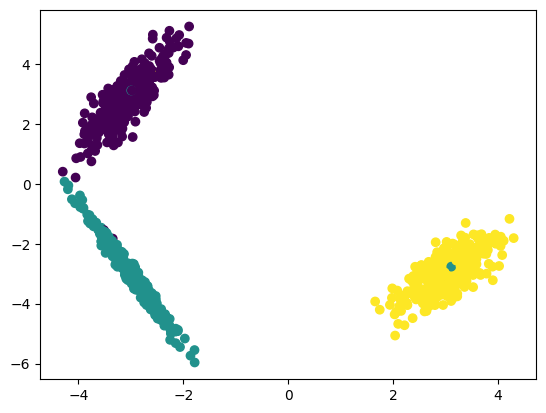

بدون پارامتر مناسب
0.4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

بهترین مقادیر:
{'max_iter': 20, 'solver': 'newton-cg'}
دقت طبقه‌بندی بهترین مدل: 0.4
SVM predictions: [1 0 1 1 2]


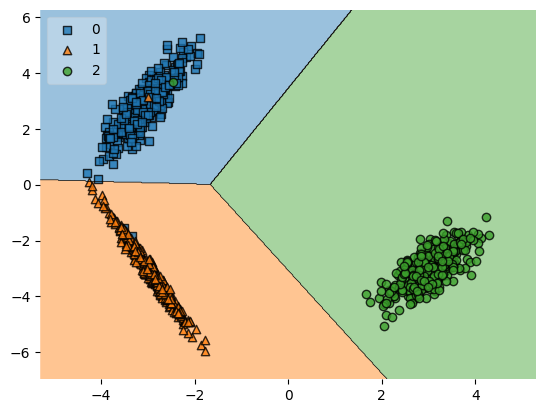

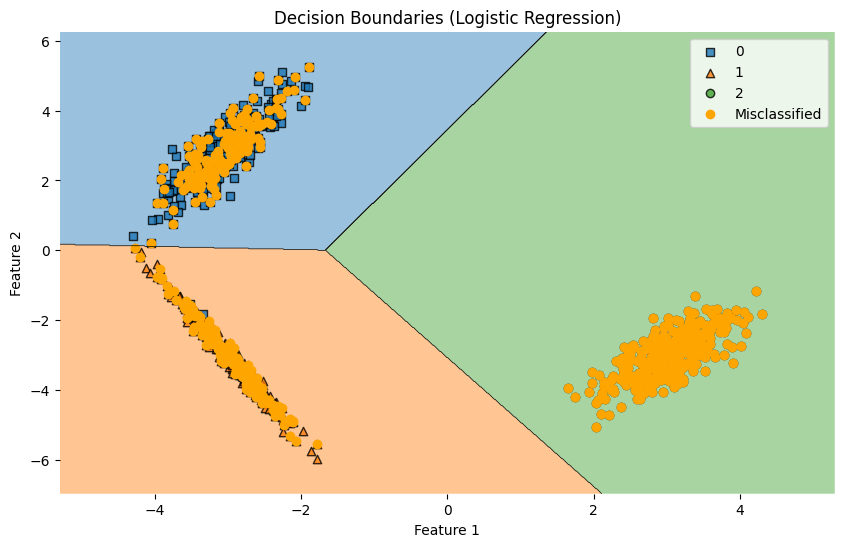

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_classes=3 , class_sep=3, random_state=23, n_redundant=0, n_clusters_per_class=1)




# رسم داده‌ها
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# نمایش نمودار
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

log_reg = LogisticRegression()
log_reg2=log_reg
svm = SVC()
log_reg2.fit(X_train, y_train)
svm.fit(X_train, y_train)
accuarcy2= accuracy_score(y_test, y_pred)
print("بدون پارامتر مناسب")
print(accuarcy2)

#پارامتر مناسب






param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [20, 50 , 70, 100, 500, 1000]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("بهترین مقادیر:")
print(best_params)

best_model = grid_search.best_estimator_
accuracy = accuracy_score(y_test, y_pred)
print("دقت طبقه‌بندی بهترین مدل:", accuracy)

#log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)

#print("Logistic Regression predictions:", log_reg.predict(X_test[:5]))
print("SVM predictions:", svm.predict(X_test[:5]))

#print("LogisticRegression train accuracy:", log_reg.score(X, y))
#print("LogisticRegression test accuracy:", log_reg.score(X_test, y_test))


plot_decision_regions(X, y, clf=grid_search, legend=2)
plt.show()




X2=X[y_pred_log_reg != y]
X2 = X2.T

# رسم نمودار مرز و نواحی تصمیم‌گیری
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, clf=log_reg, legend=2)
plt.scatter(X2[0], X2[1], c='orange', label='Misclassified')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries (Logistic Regression)')
plt.legend()
plt.show()
